In [9]:
dataset_path = '/content/drive/MyDrive/processed_train_data.csv'

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv(dataset_path)

# Display a sample of the dataset
print(df.head())


                                                Text Label
0  ധർമ്മം ധർമ്മം ധർമ്മം തരണേ അതാണോടാ ഈ ധർമ്മ എത് ...     R
1  നീയെന്താ മലയാളത്തിൽ തൊലിക്കുന്ന വന്നിരുന്നു കൊ...     P
2  നിങ്ങൾ നോക്കിക്കോളൂ അമിത്ഷായുടേ എത് ഫോട്ടോയും ...     P
3  അല്ലേങ്കിൽ ചനറൽ ന്യൂട്രാലിറ്റി കൊണ്ടുവരുന്ന സമ...     G
4     നമ്മുടേ ടിപ്പുസുൽത്താൻ എന്ന് പറഞ്ഞ കൊള്ളക്കാരൻ     R


In [11]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df['Text']
y = df['Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer  # Use TfidfVectorizer instead

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform test data


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Decision Tree with Hyperparameter Tuning:
               precision    recall  f1-score   support

           C       0.93      0.91      0.92        81
           G       0.90      1.00      0.95        81
           N       0.92      0.84      0.88        81
           P       0.98      0.96      0.97        82
           R       0.99      0.99      0.99        81

    accuracy                           0.94       406
   macro avg       0.94      0.94      0.94       406
weighted avg       0.94      0.94      0.94       406

Accuracy: 0.9409
Log Loss: 2.1307


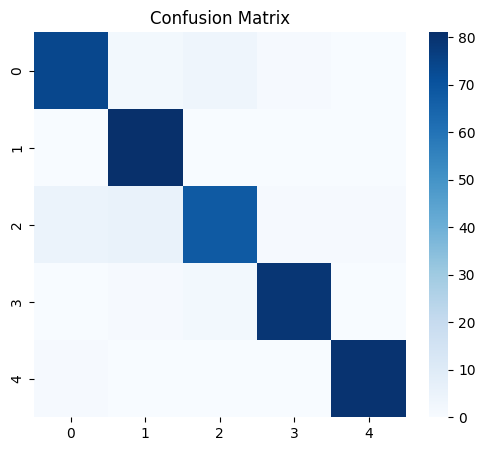

Macro F1 Score: 0.9402


<ipython-input-13-69f66fefc8c2>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


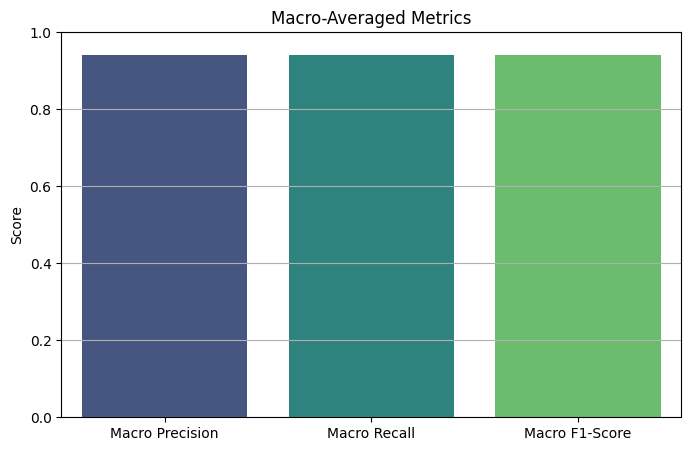

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],              # Split criteria
    'max_depth': [None, 10, 20, 30, 40, 50],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],        # Number of features to consider when looking for the best split
    'random_state': [42]                           # Ensure reproducibility
}

# Initialize the DecisionTreeClassifier
dt_tfidf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_tfidf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Use the best estimator from grid search to make predictions
best_dt_tfidf = grid_search.best_estimator_

# Predictions
y_pred_tfidf_dt = best_dt_tfidf.predict(X_test_tfidf)
y_prob_tfidf_dt = best_dt_tfidf.predict_proba(X_test_tfidf)  # Probabilities for all classes

# Print Classification Report
print("Decision Tree with Hyperparameter Tuning:\n", classification_report(y_test, y_pred_tfidf_dt))

# Accuracy
accuracy_d = accuracy_score(y_test, y_pred_tfidf_dt)
print(f"Accuracy: {accuracy_d:.4f}")

# Calculate Log Loss (Loss for multi-class classification)
loss_d = log_loss(y_test, y_prob_tfidf_dt)
print(f"Log Loss: {loss_d:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf_dt)

# Heatmap Visualization (No Labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics (Precision, Recall, F1)
macro_precision, macro_recall, macro_f1_d, _ = precision_recall_fscore_support(
    y_test, y_pred_tfidf_dt, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1_d:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1_d]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Best Cross-Validation Score: 0.9538
Random Forest with Hyperparameter Tuning:
               precision    recall  f1-score   support

           C       0.96      0.95      0.96        81
           G       0.98      1.00      0.99        81
           N       0.95      0.96      0.96        81
           P       0.99      0.95      0.97        82
           R       0.99      1.00      0.99        81

    accuracy                           0.97       406
   macro avg       0.97      0.97      0.97       406
weighted avg       0.97      0.97      0.97       406

Accuracy: 0.9729
Log Loss: 0.2422


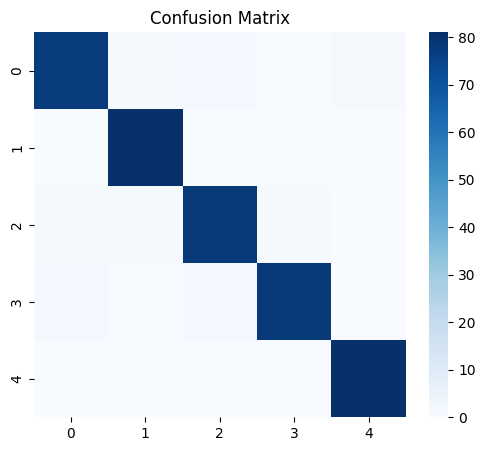

Macro F1 Score: 0.9728


<ipython-input-14-bc18117f06fd>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


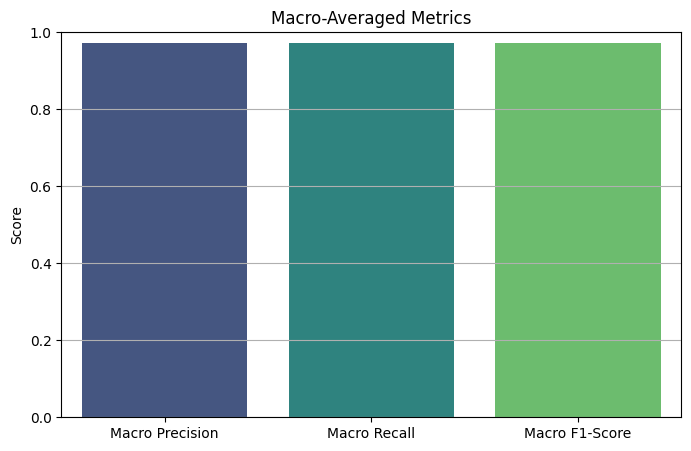

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider when looking for the best split
    'random_state': [42]                          # Ensures reproducibility
}

# Initialize the RandomForestClassifier
rf_tfidf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_tfidf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_rf.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Score: {best_score_rf:.4f}")

# Use the best estimator from grid search to make predictions
best_rf_tfidf = grid_search_rf.best_estimator_

# Predictions
y_pred_tfidf_rf = best_rf_tfidf.predict(X_test_tfidf)
y_prob_tfidf_rf = best_rf_tfidf.predict_proba(X_test_tfidf)  # Probabilities for all classes

# Print Classification Report
print("Random Forest with Hyperparameter Tuning:\n", classification_report(y_test, y_pred_tfidf_rf))

# Accuracy
accuracy_r = accuracy_score(y_test, y_pred_tfidf_rf)
print(f"Accuracy: {accuracy_r:.4f}")

# Calculate Log Loss (Loss for multi-class classification)
loss_r = log_loss(y_test, y_prob_tfidf_rf)
print(f"Log Loss: {loss_r:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf_rf)

# Heatmap Visualization (No Labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics (Precision, Recall, F1)
macro_precision, macro_recall, macro_f1_r, _ = precision_recall_fscore_support(
    y_test, y_pred_tfidf_rf, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1_r:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1_r]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9458
Logistic Regression with Hyperparameter Tuning:
               precision    recall  f1-score   support

           C       0.97      0.91      0.94        81
           G       0.94      1.00      0.97        81
           N       0.93      0.94      0.93        81
           P       0.99      0.95      0.97        82
           R       0.98      1.00      0.99        81

    accuracy                           0.96       406
   macro avg       0.96      0.96      0.96       406
weighted avg       0.96      0.96      0.96       406

Accuracy: 0.9606
Log Loss: 0.2178


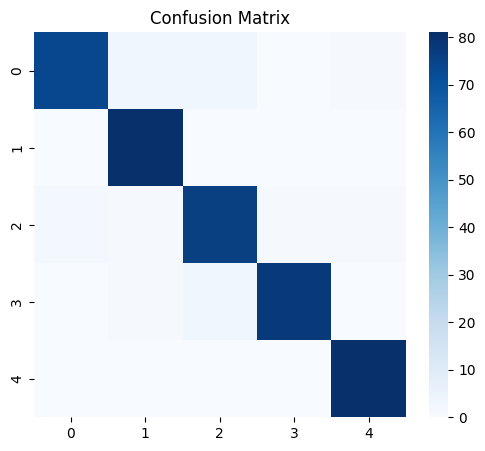

Macro F1 Score: 0.9604


<ipython-input-18-14bc57389cac>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


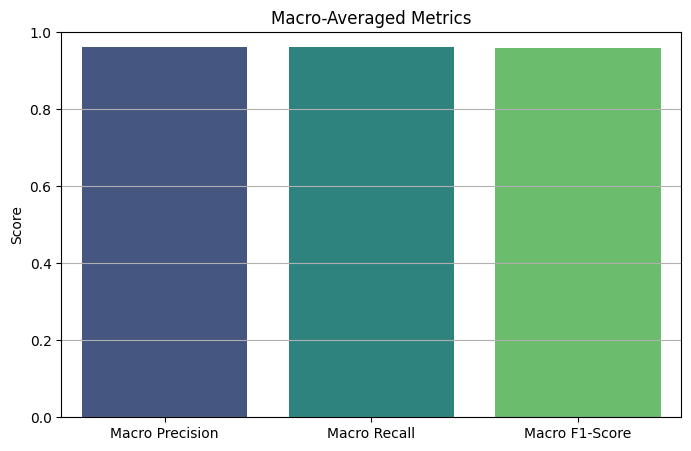

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid for LogisticRegression
param_grid_log_reg = {
    'C': [0.1, 1, 10],                 # Regularization strength; smaller values specify stronger regularization
    'penalty': ['l2'],                 # Regularization type (L2 for Ridge regression)
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithm
    'max_iter': [1000],                # Maximum number of iterations for convergence
    'random_state': [42]               # Ensures reproducibility
}

# Initialize the LogisticRegression model
log_reg = LogisticRegression(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_log_reg.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_log_reg = grid_search_log_reg.best_params_
best_score_log_reg = grid_search_log_reg.best_score_
print(f"Best Parameters: {best_params_log_reg}")
print(f"Best Cross-Validation Score: {best_score_log_reg:.4f}")

# Use the best estimator from grid search to make predictions
best_log_reg = grid_search_log_reg.best_estimator_

# Predictions
y_pred_count_log_reg = best_log_reg.predict(X_test_tfidf)
y_prob_count_log_reg = best_log_reg.predict_proba(X_test_tfidf)  # Probabilities for all classes

# Print Classification Report
print("Logistic Regression with Hyperparameter Tuning:\n", classification_report(y_test, y_pred_count_log_reg))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_count_log_reg)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Log Loss (Loss for multi-class classification)
loss = log_loss(y_test, y_prob_count_log_reg)
print(f"Log Loss: {loss:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_count_log_reg)

# Heatmap Visualization (No Labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics (Precision, Recall, F1)
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    y_test, y_pred_count_log_reg, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


In [19]:
import pandas as pd

# Create a list to hold the model names and their respective results
results = [
    ['Decision Tree', accuracy_d, loss_d, macro_f1_d],  # Fill with values for Decision Tree
    ['Random Forest', accuracy_r, loss_r, macro_f1_r],  # Fill with values for Random Forest
    ['Logistic Regression', accuracy, loss, macro_f1]  # Fill with values for Logistic Regression
]

# Create the DataFrame with the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Log Loss', 'Macro F1 Score'])

# Display the DataFrame
print("\nModel Performance Comparison:\n")
print(results_df)



Model Performance Comparison:

                 Model  Accuracy  Log Loss  Macro F1 Score
0        Decision Tree  0.940887  2.130659        0.940204
1        Random Forest  0.972906  0.242167        0.972838
2  Logistic Regression  0.960591  0.217845        0.960400


In [21]:
# Path to the test data (Excel file)
test_file_path = '/content/drive/MyDrive/processed_test_data.csv'

# Use pd.read_excel() instead of pd.read_csv() to read Excel files
test_data = pd.read_csv(test_file_path)

# Proceed with the rest of the code as before
X_test_final = tfidf_vectorizer.transform(test_data['Transcript'])  # Assuming 'Text' is the column with input data

test_data['Logistic Regression'] = best_log_reg.predict(X_test_final)  # Use the optimized Logistic Regression model
test_data['Decision Tree'] = best_dt_tfidf.predict(X_test_final)  # Use the optimized Decision Tree model
test_data['Random Forest'] = best_rf_tfidf.predict(X_test_final)  # Use the optimized Random Forest model

# Save the predictions to a CSV file
output_csv_path = '/content/drive/MyDrive/tfidf_baseml_predictions.csv'
test_data.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Predictions saved to {output_csv_path}")


Predictions saved to /content/drive/MyDrive/tfidf_baseml_predictions.csv
